In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

MovieMetadata_df = pd.read_csv('MovieSummaries/movie.metadata.tsv', sep='\t', header=None)

CharacterMetadata_df = pd.read_csv('MovieSummaries/character.metadata.tsv', sep='\t', header=None)

# Define column headers as a list
MovieMetadata_df_headers = [
    'Wikipedia movie ID',
    'Freebase movie ID',
    'Movie name',
    'Movie release date',
    'Movie box office revenue',
    'Movie runtime',
    'Movie languages (Freebase ID:name tuples)',
    'Movie countries (Freebase ID:name tuples)',
    'Movie genres (Freebase ID:name tuples)'
]

MovieMetadata_df.columns = MovieMetadata_df_headers

# Define column headers for the second dataset
CharacterMetadata_df_headers = [
    'Wikipedia movie ID',
    'Freebase movie ID',
    'Movie release date',
    'Character name',
    'Actor date of birth',
    'Actor gender',
    'Actor height (in meters)',
    'Actor ethnicity (Freebase ID)',
    'Actor name',
    'Actor age at movie release',
    'Freebase character/actor map ID',
    'Freebase character ID',
    'Freebase actor ID'
]

CharacterMetadata_df.columns = CharacterMetadata_df_headers

# Text data 
names_df = pd.read_csv('MovieSummaries/name.clusters.txt', sep="\t", header=None)
plot_summaries_df = pd.read_csv('MovieSummaries/plot_summaries.txt', sep="\t", header=None)
tvTropes_df = pd.read_csv('MovieSummaries/tvtropes.clusters.txt', sep="\t", header=None)

names_df_headers = [
    'Character Names',
    'Instances'
]

names_df.columns = names_df_headers

tvTropes_df_headers = [
    'Character Types',
    'Instances'
]

tvTropes_df.columns = tvTropes_df_headers

plot_summaries_df_headers = [
    'Wikipedia movie ID',
    'Summaries'
]

plot_summaries_df.columns = plot_summaries_df_headers

import ast
MovieMetadata_df['Country dictionnaire'] = MovieMetadata_df['Movie countries (Freebase ID:name tuples)'].apply(ast.literal_eval)
MovieMetadata_df['Genre dictionnaire'] = MovieMetadata_df['Movie genres (Freebase ID:name tuples)'].apply(ast.literal_eval)
MovieMetadata_df['Language dictionnaire'] = MovieMetadata_df['Movie languages (Freebase ID:name tuples)'].apply(ast.literal_eval)


In [35]:
print(tvTropes_df.head(5))
print(names_df.head(5))

           Character Types                                          Instances
0  absent_minded_professor  {"char": "Professor Philip Brainard", "movie":...
1  absent_minded_professor  {"char": "Professor Keenbean", "movie": "Richi...
2  absent_minded_professor  {"char": "Dr. Reinhardt Lane", "movie": "The S...
3  absent_minded_professor  {"char": "Dr. Harold Medford", "movie": "Them!...
4  absent_minded_professor  {"char": "Daniel Jackson", "movie": "Stargate"...
  Character Names  Instances
0   Stuart Little  /m/0k3w9c
1   Stuart Little  /m/0k3wcx
2   Stuart Little  /m/0k3wbn
3        John Doe  /m/0jyg35
4        John Doe  /m/0k2_zn


### Nombre de films par pays:

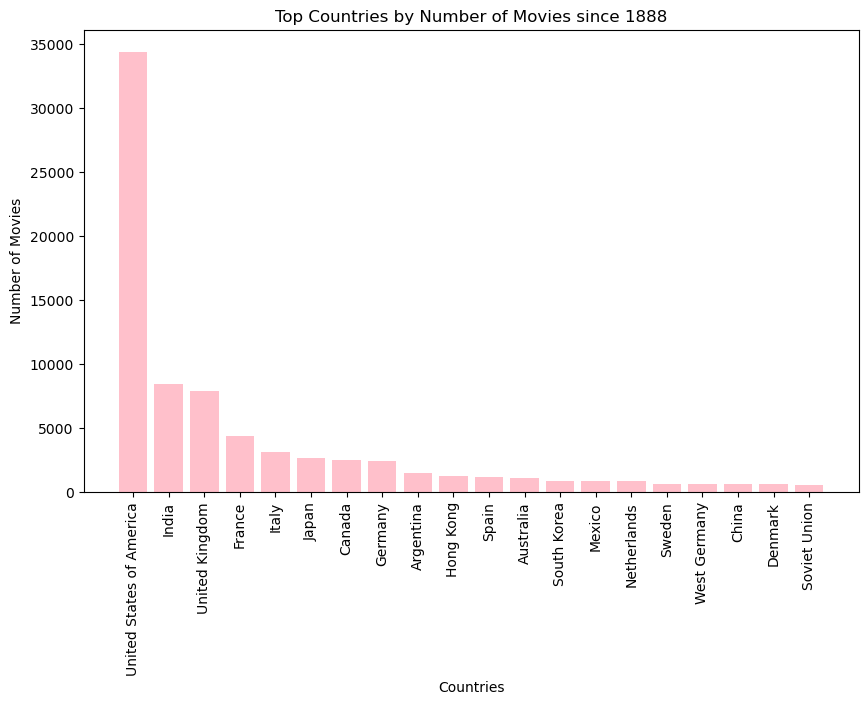

In [36]:
countries_counts = Counter()

for country_dict in MovieMetadata_df['Country dictionnaire']:
    countries_counts.update(country_dict.values())

countries_counts = sorted(countries_counts.items(), key=lambda x: x[1], reverse= True)

#print("Nombre de films par pays:")
#display(countries_counts)

countries, counts = zip(*countries_counts)

top_n = 20
countries = countries[:top_n]
counts = counts[:top_n]

plt.figure(figsize=(10, 6))
plt.bar(countries, counts, color='pink')
plt.xlabel("Countries")
plt.ylabel("Number of Movies")
plt.title("Top Countries by Number of Movies since 1888")
plt.xticks(rotation=90)  
plt.show()


### Nombre de films par genre: 

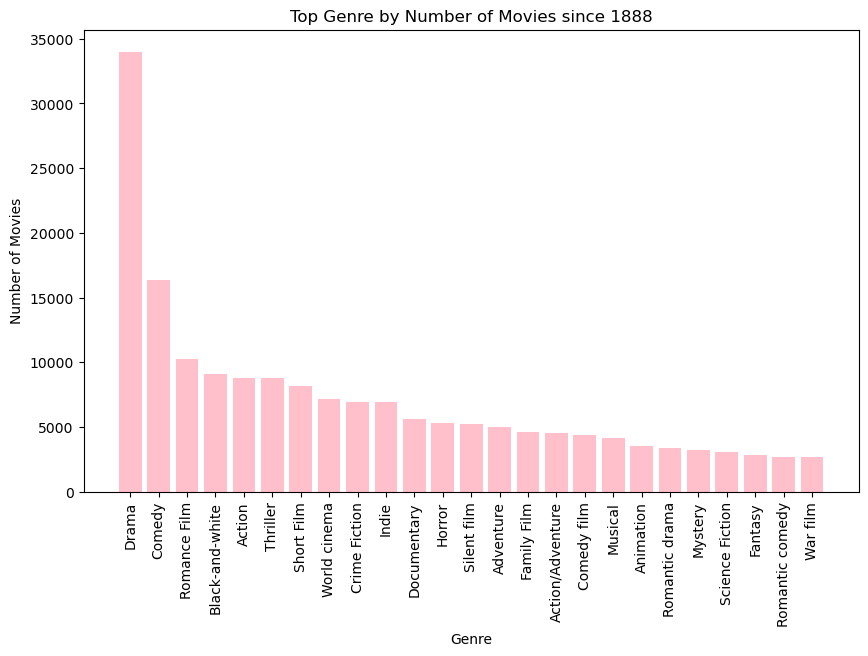

In [37]:
genre_counts = Counter()

for genre_dict in MovieMetadata_df['Genre dictionnaire']:
    genre_counts.update(genre_dict.values())

genre_counts = sorted(genre_counts.items(), key=lambda x: x[1], reverse= True)

#print("Nombre de films par pays:")
#display(genre_counts)

genres, counts = zip(*genre_counts)

top_n = 25
genres = genres[:top_n]
counts = counts[:top_n]

plt.figure(figsize=(10, 6))
plt.bar(genres, counts, color='pink')
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Top Genre by Number of Movies since 1888")
plt.xticks(rotation=90)  
plt.show()

In [38]:
# Function to extract the year
def extract_year(date_str):
    if pd.isna(date_str):  # Check if the value is NaN
        return None  # Return None or a suitable placeholder for NaN
    if len(date_str) == 4:  # Check if it's a four-digit year
        return int(date_str)  # Return the year as an integer
    return pd.to_datetime(date_str, errors='coerce').year  # Convert to datetime and extract year


# Extract the year without modifying the original column
MovieMetadata_df['Year'] = MovieMetadata_df['Movie release date'].apply(extract_year)
MovieMetadata_df['Year'] = MovieMetadata_df['Year'].apply(lambda x: int(x) if pd.notna(x) else x)


### Join MovieMetadata/ summaries 

In [39]:
print(plot_summaries_df.shape)

#Jointure tableau principal des films/summaries 
MovieMetadata_df_1 = pd.merge(MovieMetadata_df, plot_summaries_df, on = "Wikipedia movie ID", how="inner")

print(MovieMetadata_df_1.shape)

(42303, 2)
(42204, 14)


### **Select strings that could define a movie related to the space**

In [40]:
substrings = ['Space', 'space', 'astronaut', 'Moon', 'moon', 'rocket', 'NASA', 'galaxy', 'planets', 'Apollo', 'black hole', 'gravity', 
              'alien', 'Race Space', 'Spoutnik', 'spaceship', 'light year']
# substrings_jacques = ['NASA', 'space race', 'space', 'Space', 'rocket', 'USSR', 'Apollo']

pattern = '|'.join(substrings)

space_movies = MovieMetadata_df_1[MovieMetadata_df_1['Summaries'].str.contains(pattern, case=False, na=False)]

print(space_movies.shape)

(3094, 14)


### **Show the yearly distribution of space related movies**

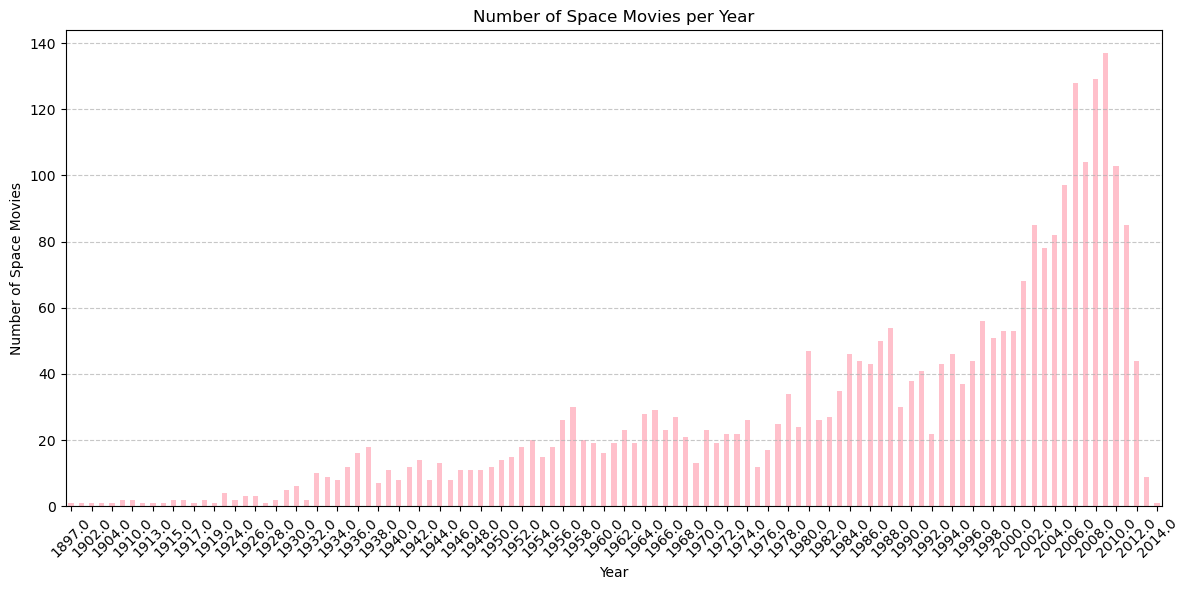

In [41]:
space_movies_per_year =space_movies['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
space_movies_per_year.plot(kind='bar', color='pink')
plt.title('Number of Space Movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Space Movies')
plt.xticks(ticks=range(0, len(space_movies_per_year), 2), labels=space_movies_per_year.index[::2], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Space Race : 1957-1975

1957 --> Spoutnik 1, first satellite in orbit by the USSR 

The number of space related movies starts to increase starting from the 1950s. 
Boom of such movies in 2000s principally due to special effects technology development.


**Normalize by the number of movies produced each year**

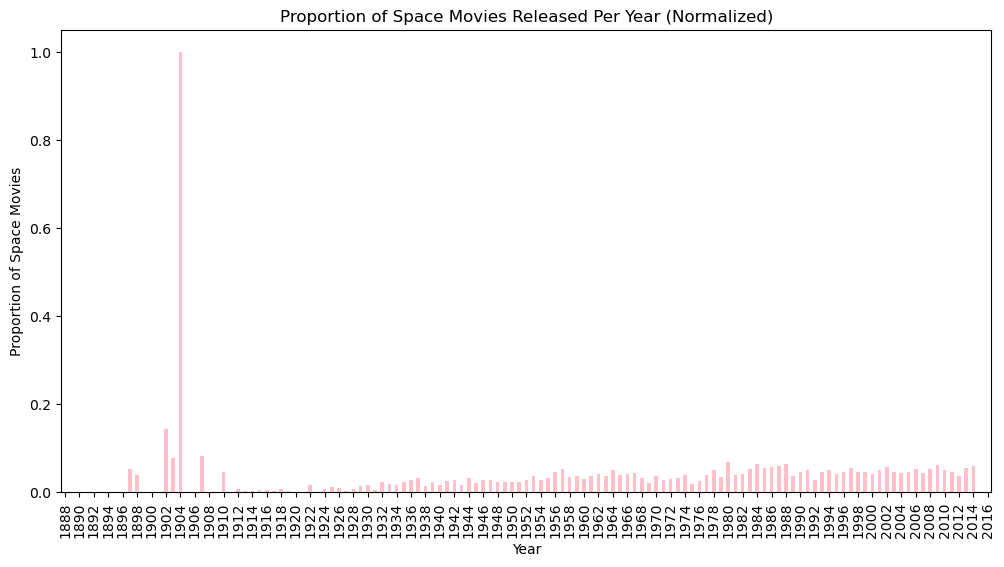

In [42]:
movies_per_year = MovieMetadata_df['Year'].value_counts().sort_index() #number of movies per year

all_years = pd.RangeIndex(start=min(movies_per_year.index.min(), space_movies_per_year.index.min()), 
                          stop=max(movies_per_year.index.max(), space_movies_per_year.index.max()) + 1)

movies_per_year = movies_per_year.reindex(all_years, fill_value=0)
space_movies_per_year = space_movies_per_year.reindex(all_years, fill_value=0)

proportion_space_movies_per_year = (space_movies_per_year / movies_per_year).fillna(0)

plt.figure(figsize=(12, 6))
proportion_space_movies_per_year.plot(kind='bar', color='pink')
plt.title('Proportion of Space Movies Released Per Year (Normalized)')
plt.xlabel('Year')
plt.ylabel('Proportion of Space Movies')
plt.xticks(ticks=range(0, len(space_movies_per_year), 2), labels=space_movies_per_year.index[::2], rotation=90)
plt.show()

**Get rid of the outliers (every year <= 1904) to get a realistic sense of the distribution**

In [43]:
space_movies['Movie release date'] = space_movies['Movie release date'].apply(
    lambda x: x[:4] if isinstance(x, str) and len(x) > 4 else x
)
space_movies = space_movies.dropna(subset=['Movie release date'])
space_movies['Movie release date'] = space_movies['Movie release date'].astype(int)
space_movies = space_movies[space_movies['Movie release date'] > 1904]

C:\Users\jacqu\AppData\Local\Temp\ipykernel_3780\1720370461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  space_movies['Movie release date'] = space_movies['Movie release date'].apply(


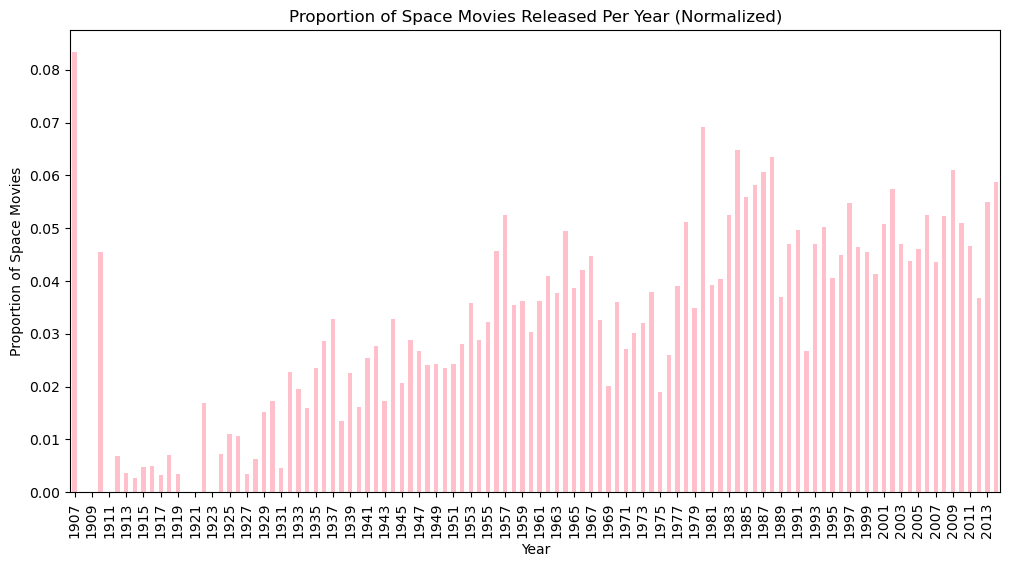

In [44]:
movies_per_year = MovieMetadata_df['Year'].value_counts().sort_index() #number of movies per year
space_movies_per_year =space_movies['Year'].value_counts().sort_index()

all_years = pd.RangeIndex(start=space_movies_per_year.index.min(), 
                          stop=space_movies_per_year.index.max() + 1)

movies_per_year = movies_per_year.reindex(all_years, fill_value=0)
space_movies_per_year = space_movies_per_year.reindex(all_years, fill_value=0)

proportion_space_movies_per_year = (space_movies_per_year / movies_per_year).fillna(0)

plt.figure(figsize=(12, 6))
proportion_space_movies_per_year.plot(kind='bar', color='pink')
plt.title('Proportion of Space Movies Released Per Year (Normalized)')
plt.xlabel('Year')
plt.ylabel('Proportion of Space Movies')
plt.xticks(ticks=range(0, len(space_movies_per_year), 2), labels=space_movies_per_year.index[::2], rotation=90)
plt.show()

### **Number of space-related movies per country:** 

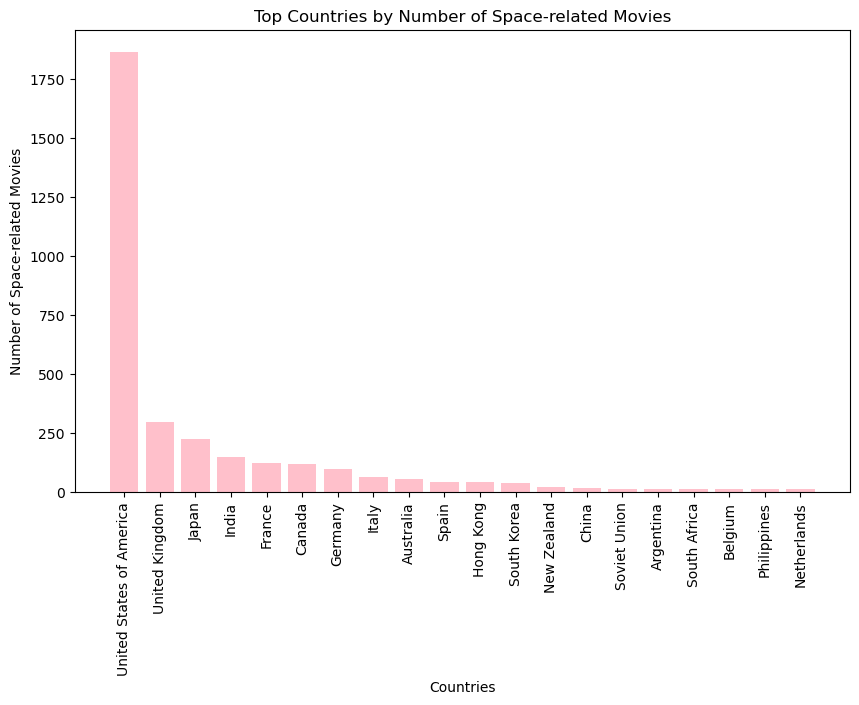

In [45]:
countries_counts_space = Counter()

for country_dict in space_movies['Country dictionnaire']:
    countries_counts_space.update(country_dict.values())

countries_counts_space = sorted(countries_counts_space.items(), key=lambda x: x[1], reverse= True)


#print("Nombre de films par pays:")
#display(countries_counts_space)

countries, counts = zip(*countries_counts_space)

top_n = 20
countries = countries[:top_n]
counts = counts[:top_n]

plt.figure(figsize=(10, 6))
plt.bar(countries, counts, color='pink')
plt.xlabel("Countries")
plt.ylabel("Number of Space-related Movies")
plt.title("Top Countries by Number of Space-related Movies")
plt.xticks(rotation=90)  # Tourner les noms des pays pour une meilleure lisibilité
plt.show()

### **Genre of space movies:** 

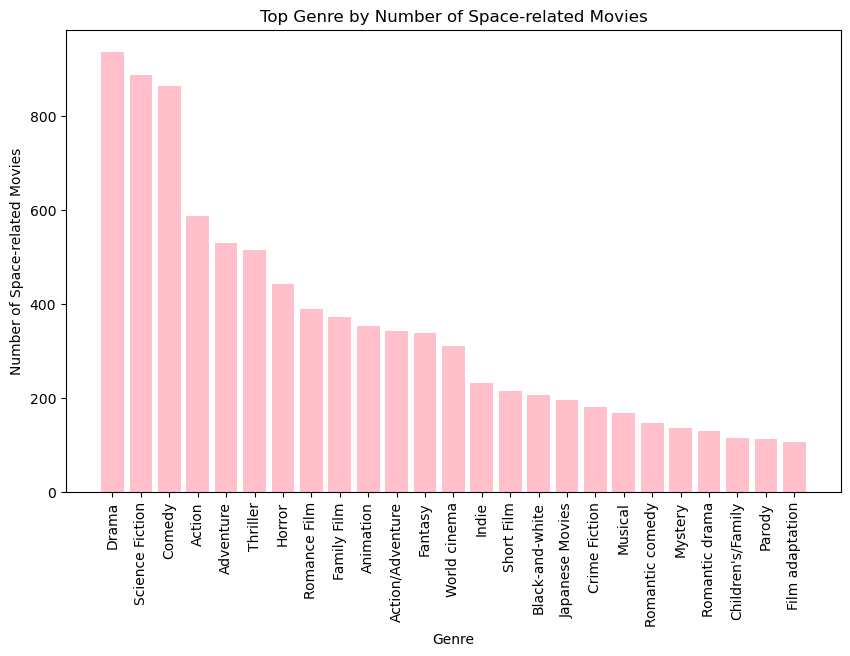

In [46]:
genre_counts_space = Counter()

for genre_dict in space_movies['Genre dictionnaire']:
    genre_counts_space.update(genre_dict.values())

genre_counts_space = sorted(genre_counts_space.items(), key=lambda x: x[1], reverse= True)
#display(genre_counts_space)

genre, counts = zip(*genre_counts_space)

top_n = 25
genre = genre[:top_n]
counts = counts[:top_n]

plt.figure(figsize=(10, 6))
plt.bar(genre, counts, color='pink')
plt.xlabel("Genre")
plt.ylabel("Number of Space-related Movies")
plt.title("Top Genre by Number of Space-related Movies")
plt.xticks(rotation=90)  # Tourner les noms des pays pour une meilleure lisibilité
plt.show()

### **Plot the yearly box office revenue of space related movies**

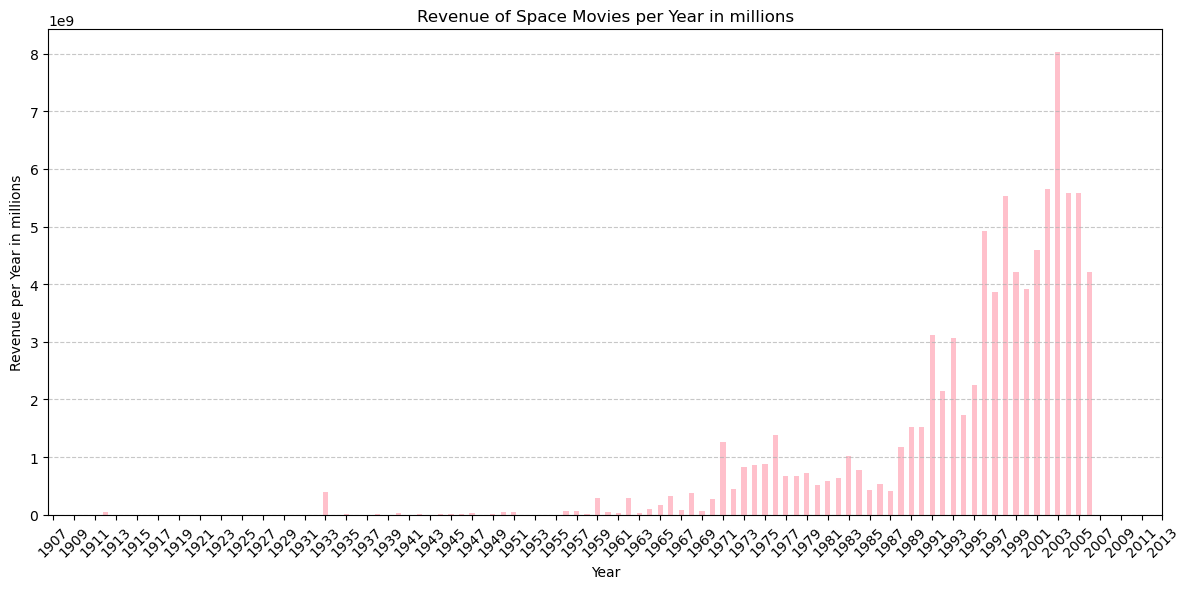

In [47]:
space_revenue_per_year = space_movies.groupby('Year')['Movie box office revenue'].sum()

plt.figure(figsize=(12, 6))
space_revenue_per_year.plot(kind='bar', color='pink')
plt.title('Revenue of Space Movies per Year in millions')
plt.xlabel('Year')
plt.ylabel('Revenue per Year in millions')
plt.xticks(ticks=range(0, len(space_movies_per_year), 2), labels=space_movies_per_year.index[::2], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Normalize the revenue by the total revenue of movies that year**s

Although a reserve can be made about this considering that we do not have box office revenue for every movie of the dataset so this visualization should be taken with consideration.

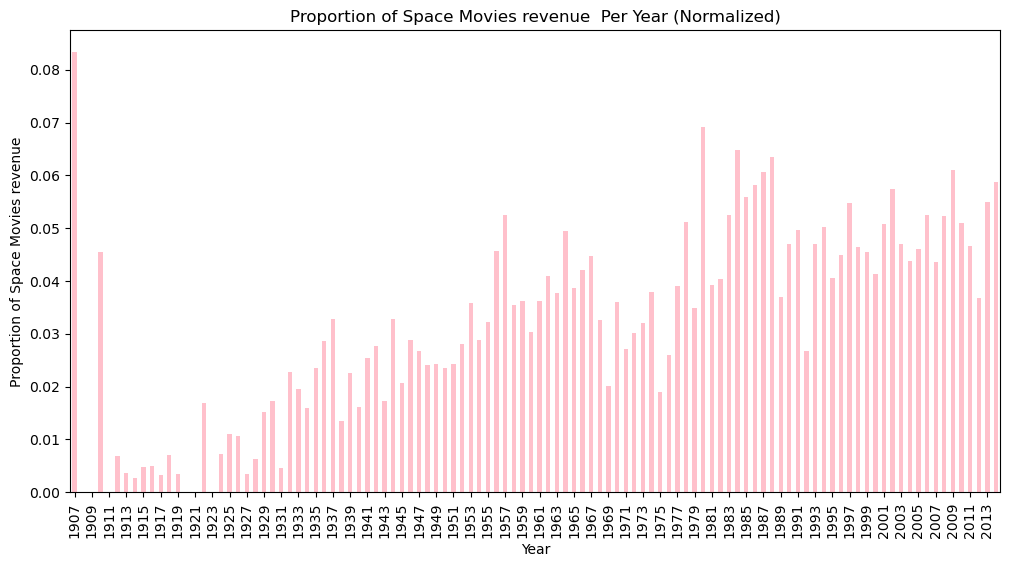

In [48]:
revenue_per_year = MovieMetadata_df.groupby('Year')['Movie box office revenue'].sum()

all_years = pd.RangeIndex(start=min(movies_per_year.index.min(), space_movies_per_year.index.min()), 
                          stop=max(movies_per_year.index.max(), space_movies_per_year.index.max()) + 1)

revenue_per_year = revenue_per_year.reindex(all_years, fill_value=0)
space_revenue_per_year= space_revenue_per_year.reindex(all_years, fill_value=0)

proportion_revenue_space_movies_per_year = (space_movies_per_year / movies_per_year).fillna(0)

plt.figure(figsize=(12, 6))
proportion_revenue_space_movies_per_year.plot(kind='bar', color='pink')
plt.title('Proportion of Space Movies revenue  Per Year (Normalized)')
plt.xlabel('Year')
plt.ylabel('Proportion of Space Movies revenue')
plt.xticks(ticks=range(0, len(space_movies_per_year), 2), labels=space_movies_per_year.index[::2], rotation=90)
plt.show()

### **Print the number of US and USSR made movies on which we have information on box office revenue**

In [49]:
# Function to find the country of production of a movie
def find_country(s):
    try:
        start_idx = s.index(': "') + len(': "')
        end_idx = s.index('"', start_idx)
        #print(start_idx, end_idx)
        return s[start_idx:end_idx]
    except ValueError:
        return ""

# Create column with country of production
space_movies['Country'] = space_movies['Movie countries (Freebase ID:name tuples)'].apply(lambda x: find_country(x))

# Find out if the country of production is either the USA or part of the USSR
us_space_movies = space_movies[space_movies['Country'] == 'United States of America']
ussr_space_movies = space_movies[space_movies['Country'].isin([
    'Czechoslovakia', 'German Democratic Republic', 'Hungary', 
    'Poland', 'Romania', 'Uzbekistan', 'Soviet Union'
])]

In [50]:
print('Number of US movies that are related to the space race : ' , us_space_movies.shape[0])
print('Number of US movies related to the space race with box office revenue information : ', us_space_movies['Movie box office revenue'].dropna().shape[0])

Number of US movies that are related to the space race :  1846
Number of US movies related to the space race with box office revenue information :  778


In [51]:
print('Number of USSR movies that are related to the space race : ' , ussr_space_movies.shape[0])
print('Number of USSR movies related to the space race with box office revenue information : ', ussr_space_movies['Movie box office revenue'].dropna().shape[0])

Number of USSR movies that are related to the space race :  23
Number of USSR movies related to the space race with box office revenue information :  0


*We have no information on the box office revenue of the space related movies produced by the USSR which makes it hard to compare with the ones made in the US. Using another dataset containing these values could allow us to compare the financial success of such space-related movies between the US and USSR.*